In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier


In [2]:
gender = pd.read_csv("C:/Users/lenovo/Downloads/datasety/gender_submission.csv")
test = pd.read_csv("C:/Users/lenovo/Downloads/datasety/test.csv")
train = pd.read_csv("C:/Users/lenovo/Downloads/datasety/train.csv")


In [3]:
train.head(5)
#pclass = Ticket class; 1st = Upper
#2nd = Middle
#3rd = Lower
#SibSp = of siblings / spouses aboard the Titanic
#parch = # of parents / children aboard the Titanic
# fare = cena jízdenky
#cabin = cabin number
# embarked = port of embarkation (přístav nalodění)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train = train.drop_duplicates()

In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#tohle vole udělej i u toho testovaciho datasetu, jinak to bude fiasko jak svině
kabina = train["Cabin"]
kabina = kabina.fillna("None")
kabina = kabina.tolist()
train['Cabina'] = kabina

In [7]:
train.head(2)
#zbav se te cabiny původní
train = train.iloc[0:,[1,2,3,4,5,6,7,8,9,11,12]]

In [8]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabina
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,None
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C85


In [9]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Cabina        0
dtype: int64

In [10]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())
train.isna().sum()
len(train)

891

In [11]:
train = train.dropna()
train.isna().sum()
len(train)

889

D:\Python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


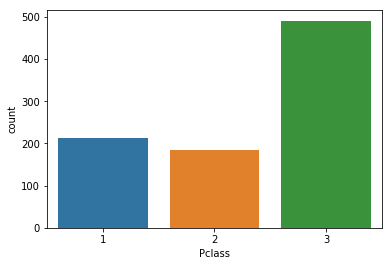

In [12]:
sns.countplot(train["Pclass"])

D:\Python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


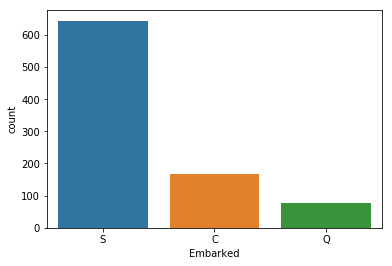

In [13]:
sns.countplot(train["Embarked"])

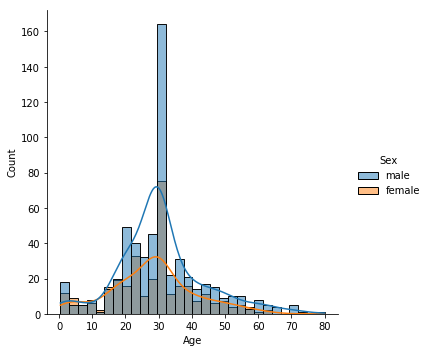

In [14]:
sns.displot(data=train, x='Age',kde=True,hue="Sex")

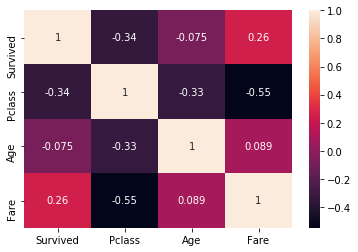

In [15]:
#existuje nějakej vztah mezi cenou jízdenky,třídou a věkem kterou týpci jeli?
sns.heatmap(train.iloc[:,[0,1,4,8]].corr(),annot=True)

In [16]:
pd.pivot_table(data=train,values="Name",index=["Survived"],columns = ["Embarked"],aggfunc = 'count',margins = True)

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


In [17]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabina
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,None
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C85


In [18]:
#replacni male za 0 a female za 1 ať to můžu narvat do modelu LG
pohlavipasazeru = []
for i in train["Sex"]:
    if i == "male":
        i = 0
    elif i == "female":
        i = 1
    pohlavipasazeru.append(i)
train["pohlaviciselne"] = pohlavipasazeru
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabina,pohlaviciselne
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,None,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C85,1


In [19]:
#jednoduchá Lin. regrese
y = train.iloc[:,[0]].values #survived
x = train.iloc[:,[1,4,5,6,8,11]].values 
regressor = LinearRegression()
regressor.fit(x,y)
print(regressor.coef_)
#pro každou změnu y jak se projeví na y

[[-1.69803922e-01 -5.91431799e-03 -4.33777750e-02 -1.97065931e-02
   4.11457230e-04  5.11397127e-01]]


In [20]:
#replacni male za 0 a female za 1 ať to můžu narvat do modelu LG
pohlavipasazeru = []
for i in test["Sex"]:
    if i == "male":
        i = 0
    elif i == "female":
        i = 1
    pohlavipasazeru.append(i)
test["pohlaviciselne"] = pohlavipasazeru
test.head(1)

x = test.iloc[:,[1,4,5,6,8,11]].values
y_pred = regressor.predict(x)

SyntaxError: invalid syntax (<ipython-input-20-c6c7d6079ac9>, line 14)

In [21]:
#MLPclassifier
#trenovaci data
validacni_data_x= train.iloc[600:,[1,4,5,6,8,11]].values
validacni_data_y = train.iloc[600:,[0]].values

x = train.iloc[0:600,[1,4,5,6,8,11]].values
y = train.iloc[0:600,[0]].values #survived?
clf = MLPClassifier(solver = 'lbfgs',alpha = 1e-5,hidden_layer_sizes = (5,2), random_state = 1)
clf.fit(x,y)


D:\Python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Let's evaluate the results !

 Now, let's see the results.


D:\Python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


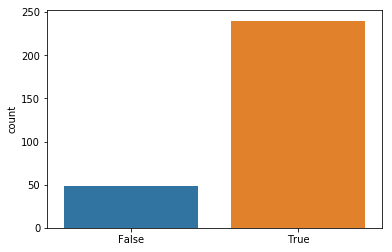

In [22]:
vysledek = clf.predict(validacni_data_x)
len(vysledek)
len(validacni_data_y)
presnost = []

if len(vysledek) == len(validacni_data_y):
    print("Let's evaluate the results !")
    
    for i in range(0,289):
        if vysledek[i] == validacni_data_y[i]:
            presnost.append(True)
        else:
            presnost.append(False)
else:
    print("lists gotta have same length.")
print("\n Now, let's see the results.")

sns.countplot(presnost)


In [23]:
presnost.count(True)/len(vysledek)

0.8304498269896193

In [34]:
from sklearn.metrics import confusion_matrix
y_true = validacni_data_y
y_pred = vysledek
array_to_plot =confusion_matrix(y_true,y_pred)
print(array_to_plot)

[[166  19]
 [ 30  74]]


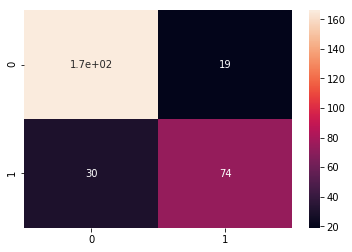

In [35]:
sns.heatmap(array_to_plot,annot = True)